# Week3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Dataset 1-Forest Fires

In [2]:
df=pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
df=df.drop(columns=["month","day"])
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [7]:
X=df.iloc[:,:-1]
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [8]:
y=df.iloc[:,-1]
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [10]:
x_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
298,8,6,91.2,147.8,377.2,12.7,19.6,43,4.9,0.0
239,7,5,81.9,3.0,7.9,3.5,13.4,75,1.8,0.0
230,4,4,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0
69,4,5,91.7,33.3,77.5,9.0,17.2,26,4.5,0.0
134,3,5,88.1,25.7,67.6,3.8,14.9,38,2.7,0.0
...,...,...,...,...,...,...,...,...,...,...
318,6,5,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0
362,7,4,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0
335,4,3,91.6,108.4,764.0,6.2,9.8,86,1.8,0.0
365,6,5,91.9,111.7,770.3,6.5,19.6,45,3.1,0.0


In [11]:
x_test

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
56,4,3,90.3,80.7,730.2,6.3,17.8,63,4.9,0.0
482,3,4,94.9,130.3,587.1,14.1,23.4,40,5.8,0.0
10,7,5,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0
449,7,4,91.6,181.3,613.0,7.6,19.3,61,4.9,0.0
17,8,5,84.9,32.8,664.2,3.0,16.7,47,4.9,0.0
...,...,...,...,...,...,...,...,...,...,...
436,8,6,92.1,207.0,672.6,8.2,26.8,35,1.3,0.0
46,5,6,90.9,126.5,686.5,7.0,14.7,70,3.6,0.0
208,6,5,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0
90,6,5,90.2,96.9,624.2,8.9,14.7,59,5.8,0.0


In [12]:
y_train

298     0.00
239     0.00
230    88.49
69      0.00
134     0.00
       ...  
318     0.00
362     0.52
335     0.00
365    20.03
227    58.30
Name: area, Length: 413, dtype: float64

In [13]:
y_test

56      0.00
482     1.29
10      0.00
449     0.00
17      0.00
       ...  
436     0.54
46      0.00
208    19.23
90      0.00
455     0.00
Name: area, Length: 104, dtype: float64

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
lr.coef_

array([ 2.03249944e+00,  1.82529477e+00, -6.78670128e-02,  4.11748629e-02,
        2.69360433e-03, -8.44560759e-01,  1.30892152e+00, -1.83524094e-01,
        2.33650991e+00, -2.08017007e+01])

In [17]:
lr.intercept_

-22.482368821144497

In [18]:
lr.score(x_train,y_train)

0.024768791806953683

In [19]:
lr.score(x_test,y_test)

-0.23319435442610925

In [20]:
y_pred=lr.predict(x_test)
y_pred

array([   8.14975418,   16.35347932,   24.86460655,   21.04332243,
         22.43039189,   19.12818261,   21.25440587,   18.37376544,
          1.56156612,    0.12691613,   -5.87662473,   21.42611849,
          8.86817912,    7.7697413 ,    2.78420553,    9.14160839,
         12.61382165,    3.00108177,   -2.0510097 ,  -12.45915665,
         19.26258341,   11.56586754,    3.73312052,    9.31916847,
          5.58809154,    2.11415452,   40.64983072,   19.62498686,
          6.30349982,    7.03865593,   23.25368045,  -24.19699926,
         24.9534989 ,   13.70002376,    6.84333838,    9.85143559,
         11.14324757,   11.41217713,   13.30110525,   14.28930247,
         19.15884118,  -15.61803777,  -14.49458294,   19.93995422,
         29.97988894,   26.45987739,   17.02994682,    5.10344559,
         31.37221053,    4.71069003,   13.71928273,    2.88283812,
         18.05638162,   17.98236382,   -3.79743482,    3.69345859,
         37.06793616,   16.72378307,   13.57178486, -105.97336

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test,y_pred)

1084.5206776439036

In [24]:
mean_absolute_error(y_test,y_pred)

19.122137827398788

In [25]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

32.93206154561089

<Figure size 1500x1000 with 0 Axes>

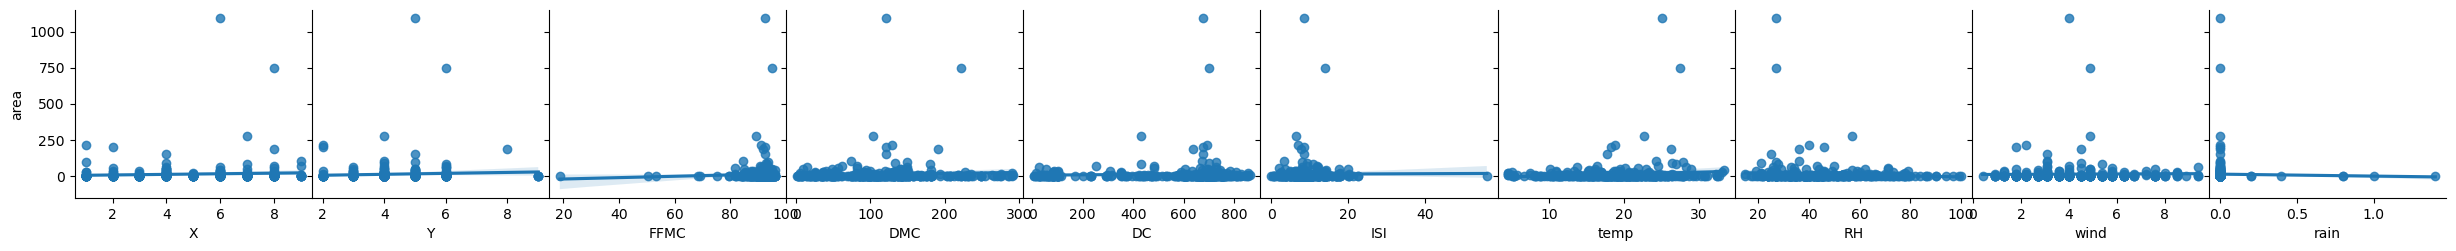

In [42]:
data = pd.concat([x_train, y_train], axis=1)

# Create a pair plot
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

<Figure size 1500x1000 with 0 Axes>

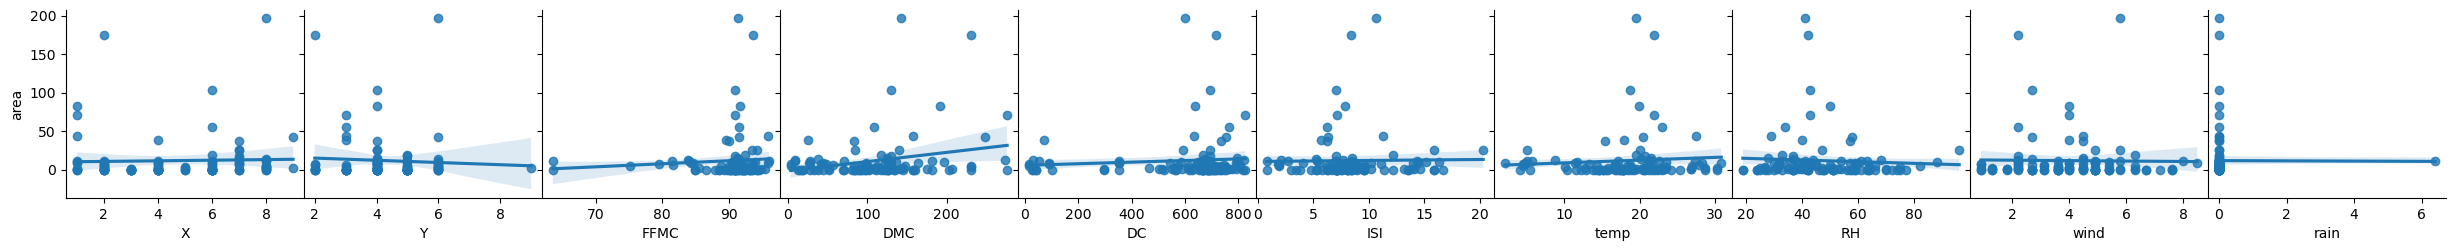

In [43]:
data = pd.concat([x_test, y_test], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

## Dataset 2-abalone.data

In [44]:
df2=pd.read_csv("abalone.data.csv")
df2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [46]:
df2.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [47]:
df2.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [58]:
df2=df2.drop(columns=["Sex"])

In [59]:
X=df2.iloc[:,:-1]
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [60]:
y=df2.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [62]:
x_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3881,0.565,0.455,0.130,1.0580,0.4390,0.2645,0.3000
3106,0.300,0.220,0.065,0.1235,0.0590,0.0260,0.0315
156,0.575,0.460,0.190,0.9940,0.3920,0.2425,0.3400
1225,0.345,0.255,0.085,0.2005,0.1050,0.0370,0.0500
3034,0.540,0.420,0.190,0.6855,0.2930,0.1630,0.3800
...,...,...,...,...,...,...,...
848,0.550,0.430,0.125,0.9230,0.4035,0.1750,0.2830
335,0.620,0.465,0.190,1.3415,0.5705,0.3175,0.3550
2004,0.375,0.275,0.085,0.2200,0.1090,0.0500,0.0605
227,0.365,0.270,0.085,0.2050,0.0780,0.0485,0.0700


In [63]:
y_train

3881    10
3106     5
156     13
1225     5
3034    10
        ..
848      8
335     11
2004     7
227      7
2761    10
Name: Rings, Length: 3341, dtype: int64

In [64]:
x_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2667,0.585,0.450,0.150,0.9380,0.4670,0.2030,0.2250
1093,0.470,0.360,0.105,0.5440,0.2700,0.1395,0.1290
3028,0.515,0.385,0.125,0.5720,0.2370,0.1435,0.1650
3309,0.485,0.355,0.120,0.5085,0.2100,0.1220,0.1350
1487,0.600,0.455,0.155,0.9450,0.4365,0.2085,0.2500
...,...,...,...,...,...,...,...
340,0.575,0.455,0.145,1.1650,0.5810,0.2275,0.3000
3089,0.455,0.350,0.110,0.4580,0.2000,0.1110,0.1305
2213,0.630,0.510,0.230,1.5390,0.5635,0.2815,0.5700
2844,0.605,0.475,0.190,1.1255,0.5900,0.2470,0.2600


In [65]:
y_test

2667     7
1093     7
3028     7
3309     9
1487     8
        ..
340     14
3089     8
2213    17
2844    10
3368    13
Name: Rings, Length: 836, dtype: int64

In [66]:
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
lr.score(x_train,y_train)

0.5177718817458011

In [68]:
lr.score(x_test,y_test)

0.5654258006256203

In [69]:
lr.coef_

array([ -1.73585756,  13.44824399,  10.89090854,   9.35018107,
       -20.02365466,  -9.91323916,   8.25279439])

In [70]:
lr.intercept_

3.1141126616581793

In [71]:
y_pred=lr.predict(x_test)

In [72]:
y_pred

array([ 9.04789637,  7.6449982 ,  9.30094219,  8.80756905,  9.97152405,
       11.12277544, 10.76528081,  6.77392018,  6.80237876, 16.82787392,
        7.01012268,  8.79396075,  9.18135108,  9.82065564,  8.17363781,
        9.54558525, 11.29960982, 11.7034207 ,  8.39896575, 10.84831836,
        7.81033146, 10.10497542,  8.6440558 ,  7.40200339,  8.74564845,
       10.97148084,  8.10347344,  8.96192815, 10.30315264,  9.83846007,
        8.84077356,  7.06274884,  7.9062006 ,  9.23605066,  7.81263349,
       10.92369707, 10.98596498,  7.61242144, 11.01516614, 10.60065813,
       13.73313989, 10.73514029, 10.02537882, 12.85428957,  9.18384584,
       10.93940309, 10.95741896, 11.19907103, 11.43066249,  8.81112784,
       10.42713273,  9.06727938,  9.591278  , 17.29818849,  9.51341318,
        9.19338284,  6.00487412,  7.31450723, 10.782978  ,  6.07663272,
        7.6951895 ,  9.0456307 ,  8.03348883, 15.63658633, 12.89098992,
       11.9911676 ,  9.97179481,  8.80936702,  8.77305554,  9.89

In [73]:
mean_squared_error(y_test,y_pred)

4.606159072986178

In [74]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

2.146196419945336

In [75]:
mean_absolute_error(y_test,y_pred)

1.587489568602431

<Figure size 1500x1000 with 0 Axes>

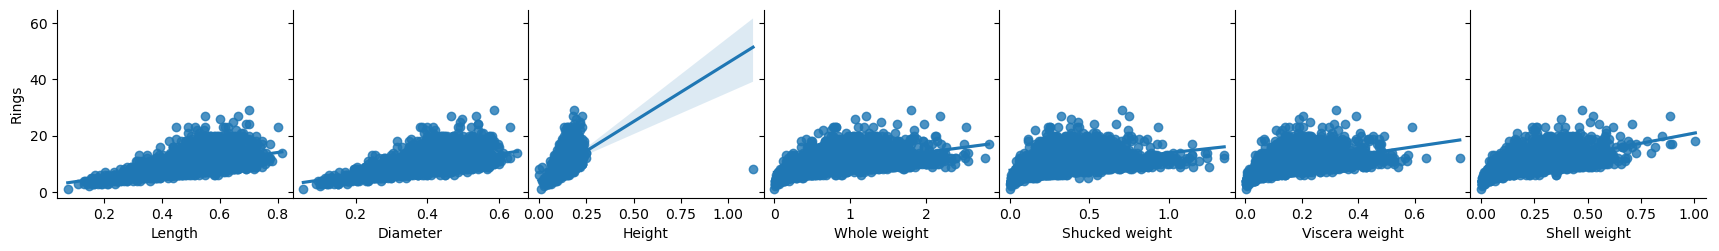

In [80]:
data = pd.concat([x_train, y_train], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

<Figure size 1500x1000 with 0 Axes>

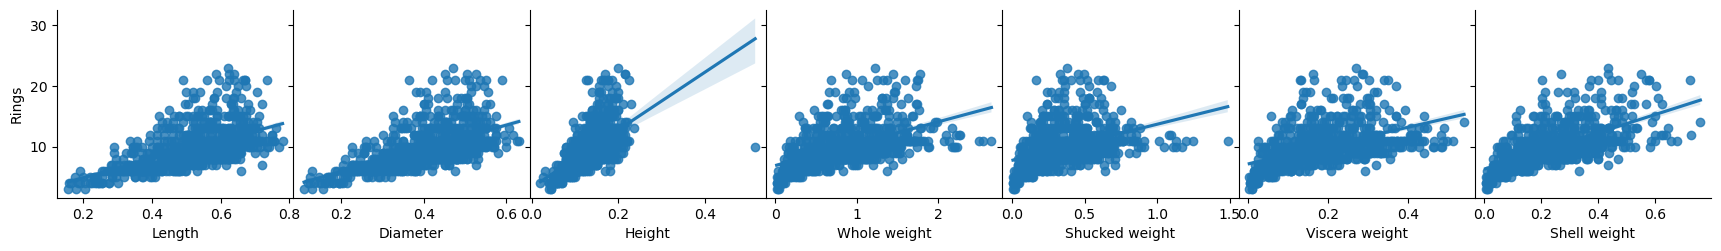

In [81]:
data = pd.concat([x_test, y_test], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

## Dataset 3-Real estate valuation data set

In [82]:
df3=pd.read_excel("Real estate valuation data set.xlsx")
df3

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [84]:
df3.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [85]:
df3.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [86]:
X=df3.iloc[:,:-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [87]:
y=df3.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [89]:
x_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
177,178,2013.083333,33.0,181.0766,9,24.97697,121.54262
220,221,2013.333333,37.2,186.5101,9,24.97703,121.54265
274,275,2013.166667,27.5,394.0173,7,24.97305,121.53994
224,225,2013.333333,34.5,324.9419,6,24.97814,121.54170
382,383,2013.000000,16.3,3529.5640,0,24.93207,121.51597
...,...,...,...,...,...,...,...
365,366,2012.916667,17.3,2261.4320,4,24.96182,121.51222
106,107,2013.083333,17.2,189.5181,8,24.97707,121.54308
227,228,2012.916667,32.4,265.0609,8,24.98059,121.53986
201,202,2013.416667,13.1,561.9845,5,24.98746,121.54391


In [90]:
x_test

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
158,159,2013.000000,11.6,390.5684,5,24.97937,121.54245
249,250,2012.833333,18.0,6306.1530,1,24.95743,121.47516
146,147,2012.750000,0.0,185.4296,0,24.97110,121.53170
367,368,2012.833333,15.0,1828.3190,2,24.96464,121.51531
232,233,2012.916667,27.1,4412.7650,1,24.95032,121.49587
...,...,...,...,...,...,...,...
373,374,2013.083333,0.0,274.0144,1,24.97480,121.53059
406,407,2013.166667,1.9,372.1386,7,24.97293,121.54026
166,167,2013.416667,0.0,292.9978,6,24.97744,121.54458
95,96,2012.916667,8.0,104.8101,5,24.96674,121.54067


In [91]:
y_train

177    42.0
220    78.3
274    41.0
224    46.0
382    29.3
       ... 
365    29.5
106    47.1
227    40.2
201    45.9
394    24.7
Name: Y house price of unit area, Length: 331, dtype: float64

In [92]:
y_test

158    39.4
249    15.0
146    52.2
367    20.9
232    17.4
       ... 
373    52.2
406    40.5
166    73.6
95     51.8
48     13.4
Name: Y house price of unit area, Length: 83, dtype: float64

In [93]:
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
lr.score(x_train,y_train)

0.6057458332387902

In [95]:
lr.score(x_test,y_test)

0.4861696564519439

In [96]:
lr.coef_

array([-2.29454874e-03,  5.09979743e+00, -2.97513238e-01, -4.92436266e-03,
        1.10165019e+00,  2.26652835e+02, -2.16437573e+01])

In [97]:
lr.intercept_

-13251.080941692024

In [98]:
y_pred=lr.predict(x_test)
y_pred

array([45.58996797,  5.57367348, 41.65388508, 30.11275524, 10.59427909,
       31.97727952, 26.89867126, 45.79640925, 35.83003963, 38.9208247 ,
       43.62280037, 12.67983477, 48.4412365 , 30.53594363, 40.77228693,
       34.56374298, 34.17062093, 43.17638617, 26.81175483, 40.35173604,
       33.82975028, 36.54964229, 47.96406367, 46.61682199, 43.29593886,
       14.66544735, 37.01222323, 42.13642803, 25.37935839, 41.44615358,
       39.18374808, 23.45962122, 30.89315124, 49.40580996, 12.29458297,
       34.00490014, 32.57802138, 48.70209678, 47.26477533, 46.36795186,
       43.6758917 , 45.63436099, 43.96730146, 30.08412651, 38.80522302,
       33.63939456, 30.72945688, 45.86100504, 44.72184483, -0.73298208,
       43.73542933, 37.96566195,  7.90566119, 47.63376307, 41.28148872,
       43.96558043, 37.12534905, 47.05694944, 52.20629822, 46.35999907,
       11.44193401, 46.91032968, 31.04880982, 41.14328832, 51.12658594,
       33.48041431, 37.90821757, 45.81273607, 45.77149616, 25.49

In [99]:
mean_squared_error(y_test,y_pred)

96.81097566711469

In [100]:
mean_absolute_error(y_test,y_pred)

7.109863568189169

In [101]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

9.839256865592782

<Figure size 1500x1000 with 0 Axes>

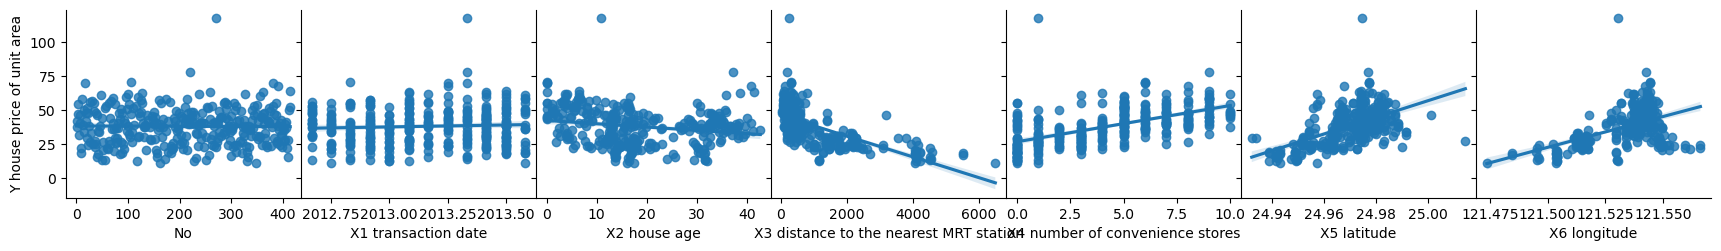

In [102]:
data = pd.concat([x_train, y_train], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

<Figure size 1500x1000 with 0 Axes>

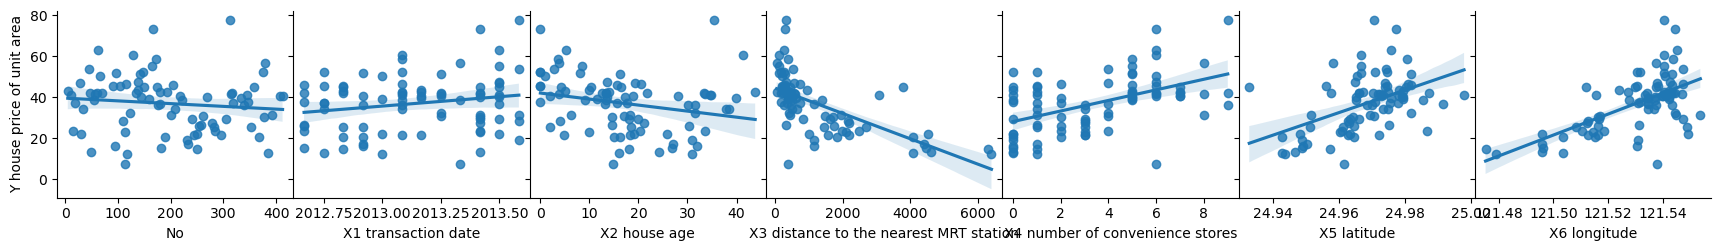

In [103]:
data = pd.concat([x_test, y_test], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

## Dataset4 - winequality-white 

In [106]:
df4=pd.read_csv("winequality-white.csv",sep=";")

In [107]:
df4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [108]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [109]:
df4.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [110]:
df4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [111]:
X=df4.iloc[:,:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [112]:
y=df4.iloc[:,-1]
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [114]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3770,7.4,0.27,0.31,2.40,0.014,15.0,143.0,0.99094,3.03,0.65,12.0
3474,6.5,0.22,0.19,1.10,0.064,36.0,191.0,0.99297,3.05,0.50,9.5
2696,6.5,0.22,0.50,16.40,0.048,36.0,182.0,0.99904,3.02,0.49,8.8
3800,8.1,0.20,0.30,1.30,0.036,7.0,49.0,0.99242,2.99,0.73,10.3
280,7.0,0.24,0.36,2.80,0.034,22.0,112.0,0.99000,3.19,0.38,12.6
...,...,...,...,...,...,...,...,...,...,...,...
335,6.3,0.23,0.30,1.80,0.033,16.0,91.0,0.99060,3.28,0.40,11.8
4714,6.1,0.22,0.40,1.85,0.031,25.0,111.0,0.98966,3.03,0.30,11.8
2004,7.4,0.26,0.31,2.40,0.043,58.0,178.0,0.99410,3.42,0.68,10.6
227,7.1,0.25,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1


In [115]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3765,6.9,0.400,0.17,12.9,0.033,59.0,186.0,0.99754,3.08,0.49,9.4
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.7
1383,7.1,0.360,0.56,1.3,0.046,25.0,102.0,0.99230,3.24,0.33,10.5
568,6.1,0.260,0.51,2.2,0.050,61.0,154.0,0.99290,3.08,0.60,9.8
1338,6.7,0.180,0.30,6.4,0.048,40.0,251.0,0.99560,3.29,0.52,10.0
...,...,...,...,...,...,...,...,...,...,...,...
2498,6.8,0.210,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,8.8
182,6.8,0.280,0.40,22.0,0.048,48.0,167.0,1.00100,2.93,0.50,8.7
3286,6.8,0.230,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9
535,7.9,0.345,0.51,15.3,0.047,54.0,171.0,0.99870,3.09,0.51,9.1


In [116]:
y_train

3770    4
3474    6
2696    6
3800    5
280     8
       ..
335     6
4714    7
2004    6
227     6
2761    5
Name: quality, Length: 3918, dtype: int64

In [117]:
y_test

3765    5
154     6
1383    6
568     6
1338    5
       ..
2498    5
182     5
3286    7
535     5
4834    7
Name: quality, Length: 980, dtype: int64

In [118]:
lr.fit(x_train,y_train)

LinearRegression()

In [119]:
lr.score(x_train,y_train)

0.2844290137362818

In [120]:
lr.score(x_test,y_test)

0.2604911448919972

In [121]:
lr.coef_

array([ 1.04463229e-01, -1.88974036e+00,  6.62061331e-02,  1.04372235e-01,
        4.14584364e-02,  2.90644086e-03,  3.02256440e-04, -2.13778478e+02,
        8.34236563e-01,  6.67038175e-01,  1.24570990e-01])

In [122]:
lr.intercept_

213.05968710358957

In [124]:
y_pred=lr.predict(x_test)

In [125]:
y_pred

array([5.42599402, 5.62058352, 5.49788822, 5.62469445, 5.80075135,
       5.6047681 , 5.07981079, 6.34043388, 5.5320055 , 6.19747628,
       5.88821499, 5.49539959, 5.66878687, 6.27216714, 5.69072476,
       6.1208164 , 4.79173804, 6.00797846, 5.48670882, 6.23137728,
       6.05175036, 6.51419745, 6.02974293, 5.58340662, 6.50930296,
       5.86476014, 6.3113039 , 6.20087444, 5.56025212, 5.51442425,
       5.71219095, 5.21030059, 6.01076521, 6.40604149, 6.03515825,
       5.9793164 , 6.43098025, 6.27396995, 5.29994995, 6.06971656,
       5.68546504, 6.16874758, 5.43801565, 5.29994995, 6.39601517,
       5.61375525, 6.44528556, 5.64159147, 6.46225317, 5.73987662,
       6.23554083, 6.00242821, 5.81488068, 5.70932028, 5.62245412,
       6.0610478 , 5.81538267, 6.4932951 , 6.25634769, 5.55791772,
       5.4832546 , 5.37298423, 6.31410289, 5.90531817, 5.4185231 ,
       6.12209962, 4.7159831 , 6.40710843, 6.93710751, 5.82623746,
       5.53442055, 6.50786246, 7.06144194, 6.40338262, 5.75724

In [126]:
mean_squared_error(y_test,y_pred)

0.5450251102227894

In [127]:
mean_absolute_error(y_test,y_pred)

0.5742902599076747

In [128]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

0.7382581596046125

<Figure size 1500x1000 with 0 Axes>

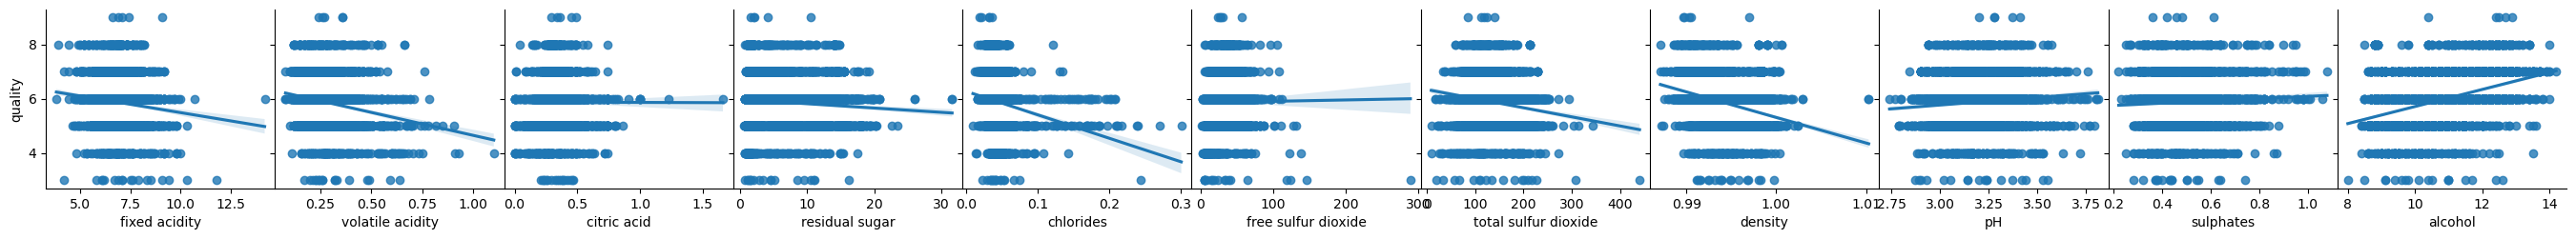

In [129]:
data = pd.concat([x_train, y_train], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

<Figure size 1500x1000 with 0 Axes>

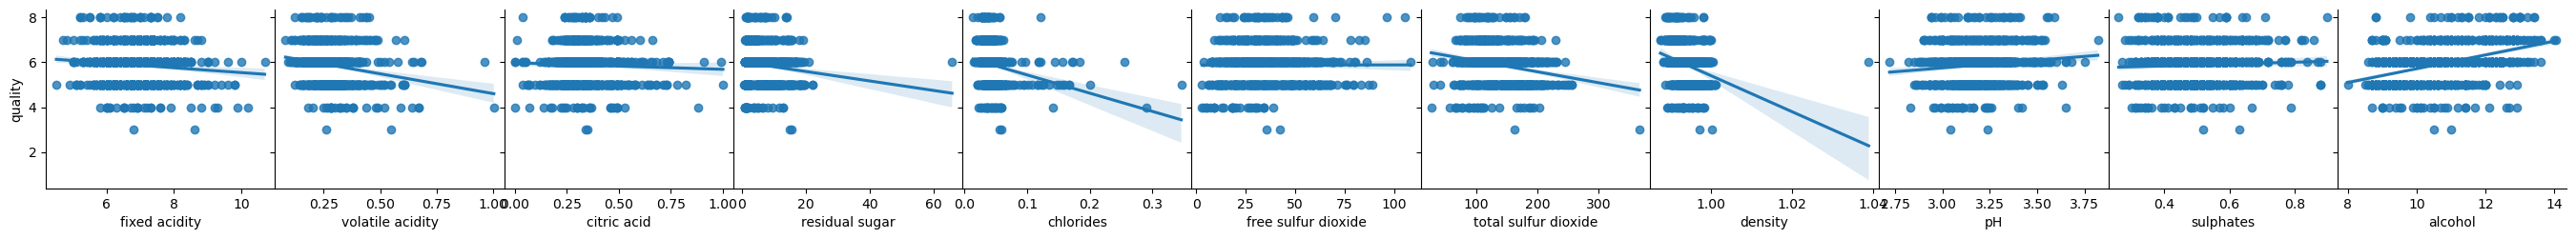

In [130]:
data = pd.concat([x_test, y_test], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

## Dataset5 - AirQualityUCI

In [131]:
df5=pd.read_excel("AirQualityUCI.xlsx")
df5

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [132]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [133]:
df5.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [134]:
df5.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [135]:
df5=df5.drop(columns=["Date","Time"])

In [136]:
df5

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [137]:
X=df5.iloc[:,:-1]

In [138]:
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000


In [139]:
y=df5.iloc[:,-1]
y

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
9352    0.756824
9353    0.711864
9354    0.640649
9355    0.513866
9356    0.502804
Name: AH, Length: 9357, dtype: float64

In [140]:
x_train,x_test,y_train,y_test=train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [141]:
x_train

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
4442,-200.0,1148.25,-200,8.725203,928.50,-200.0,815.25,-200.0,1442.50,825.50,27.150001,38.025000
5353,-200.0,1477.50,-200,25.720485,1447.25,-200.0,473.75,-200.0,2017.00,1663.75,21.200000,62.200000
9340,1.6,1115.50,-200,5.817660,803.25,232.7,696.25,153.2,1173.00,1055.00,15.525000,48.975000
993,-200.0,856.50,-200,3.015836,653.00,-200.0,1196.75,-200.0,1375.25,779.00,10.900000,71.000000
4882,-200.0,878.50,-200,2.379086,611.25,-200.0,1036.00,-200.0,1189.25,779.25,16.599999,59.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
9040,4.5,1401.75,-200,18.807754,1262.75,551.3,445.50,169.2,1639.75,1723.00,16.500000,51.550000
8527,0.6,762.25,-200,0.880474,486.75,71.4,1364.25,60.2,640.25,306.75,0.675000,41.224999
4714,-200.0,824.00,-200,2.243255,601.75,54.0,1138.25,44.0,1336.75,592.50,21.150000,63.775002
8419,1.7,1121.00,-200,7.375139,873.00,317.2,697.25,195.3,1205.75,1000.00,6.700000,76.174999


In [142]:
x_test

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
2392,2.5,1142.75,-200,14.909887,1145.75,202.0,701.25,142.0,1917.25,1291.50,29.325,34.775000
3740,0.7,840.75,-200,3.347581,673.25,40.0,1061.00,56.0,1394.25,450.75,33.550,28.800000
5136,2.0,1145.25,-200,8.381736,914.75,247.0,732.50,81.0,1585.50,891.50,21.150,68.600000
4454,-200.0,1092.75,-200,6.557207,837.25,-200.0,829.50,-200.0,1479.75,1046.75,22.050,55.349999
1792,1.0,846.50,-200,5.754223,800.25,116.0,1155.25,90.0,1178.50,648.50,21.725,18.075000
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2.1,1108.25,-200,11.724114,1040.00,145.0,767.00,95.0,1748.00,1051.00,20.300,44.125000
1682,3.8,1372.75,-200,18.416284,1251.50,205.0,669.50,154.0,1889.00,1325.00,22.950,36.475000
1558,2.3,1113.00,-200,13.062308,1085.75,138.0,881.75,119.0,1584.00,925.50,28.050,21.925000
1443,-200.0,1067.50,-200,8.437537,917.00,-200.0,889.25,-200.0,1569.50,832.25,14.850,54.975000


In [143]:
y_train

4442    1.347041
5353    1.547347
9340    0.857933
993     0.924906
4882    1.116958
          ...   
9040    0.960067
8527    0.269259
4714    1.581727
8419    0.751877
2761    0.946169
Name: AH, Length: 7485, dtype: float64

In [144]:
y_test

2392      1.396970
3740      1.469522
5136      1.701395
4454      1.449521
1792      0.464163
           ...    
1457      1.039248
1682      1.008288
1558      0.818358
1443      0.922842
8046   -200.000000
Name: AH, Length: 1872, dtype: float64

In [145]:
lr.fit(x_train,y_train)

LinearRegression()

In [146]:
lr.score(x_train,y_train)

0.9993233407676472

In [147]:
lr.score(x_test,y_test)

0.9993536592245961

In [148]:
lr.coef_

array([-6.77358769e-05, -5.00317991e-04,  1.63694048e-03,  7.78240256e-01,
       -1.79262408e-02, -3.44062415e-03, -1.02993482e-03,  5.50248367e-03,
       -4.80509332e-03,  7.09380142e-04,  2.20496715e-01,  7.31008720e-02])

In [149]:
lr.intercept_

10.561778189870353

In [150]:
y_pred=lr.predict(x_test)

In [151]:
y_pred

array([   0.80281904,    2.55105634,    1.31984299, ...,    0.4843558 ,
         -1.14444117, -199.29195129])

In [152]:
mean_squared_error(y_test,y_pred)

1.0941544036368636

In [153]:
mean_absolute_error(y_test,y_pred)

0.7794803650196865

In [154]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

1.046018357217914

<Figure size 1500x1000 with 0 Axes>

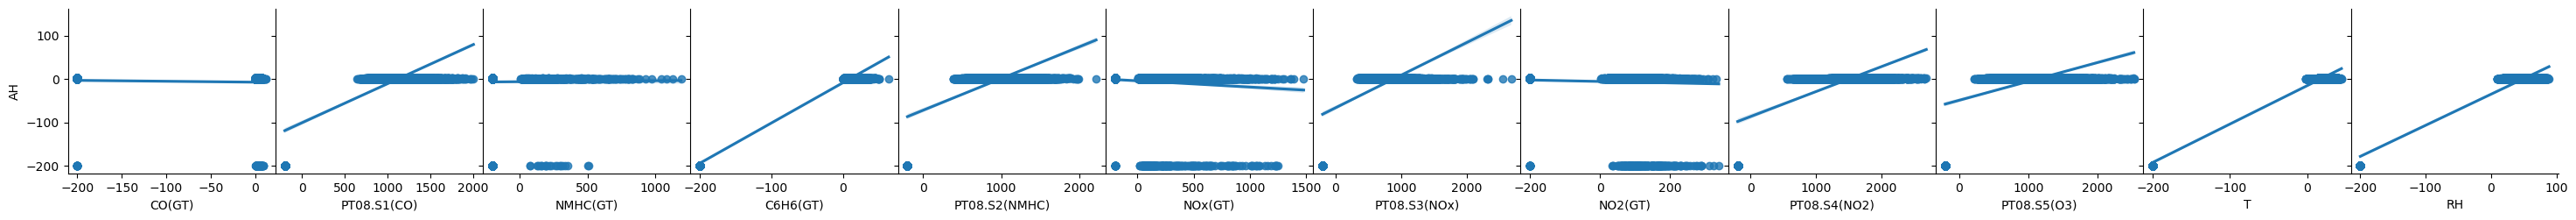

In [155]:
data = pd.concat([x_train, y_train], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

<Figure size 1500x1000 with 0 Axes>

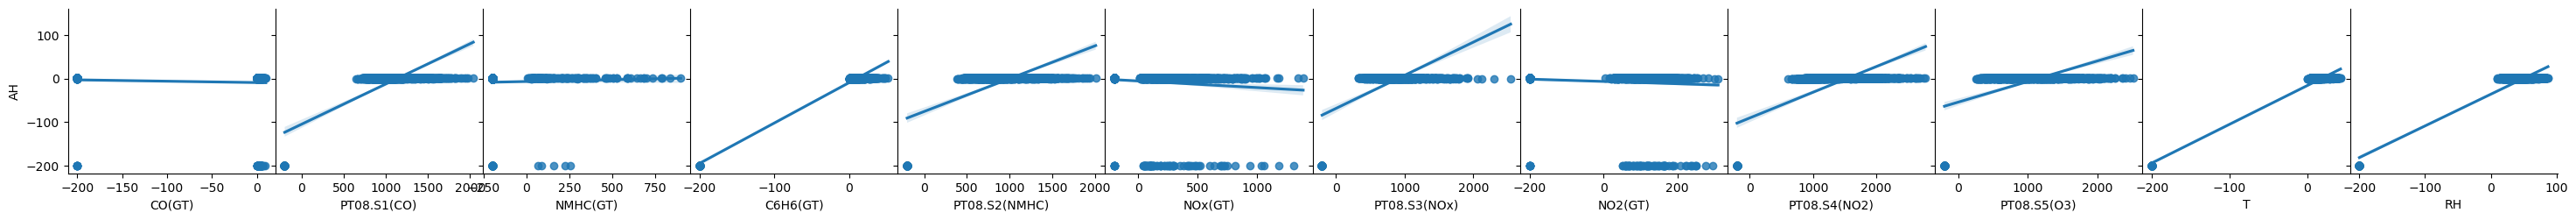

In [156]:
data = pd.concat([x_test, y_test], axis=1)
plt.figure(figsize=(15, 10))
pair_plot=sns.pairplot(data, y_vars=[data.columns[-1]], x_vars=data.columns[:-1], kind="reg")
pair_plot.fig.subplots_adjust(wspace=0, hspace=0)

plt.show()